In [267]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

from sklearn.model_selection import cross_val_score

from matplotlib import pyplot as plt

<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>
<h3 style="text-align: center;"><b>Оценка точности модели переобучение регуляризация</b></h3>

#  Домашнее задание

### Задание  
    
Решить задачу классификации при помощи обучения модели логистической регрессии. Качество модели оценивается путем подсчета метрик TPR, FPR и построения графиков ROC-кривой, Precision-Recall. Данные для обучения модели хранятся в файле athletes.csv, который можно найти в материалах к занятию.

1. Преобразуйте данные:
        - проверьте наличие пропущенных значений, 
        - преобразуйте/удалите пропуски по необходимости,
        - закодируйте категориальные переменные числовыми значениями по необходимости.
2. Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.
3. Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.
4. Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.
5. Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.
6. Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.
7. Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.
8. *Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.

Сформулируйте выводы по проделанной работе:
- как по полученным графикам сделать вывод о качестве модели? 
- Как вы оцениваете обученную модель исходя из подсчитанных метрик?
- *может ли ROC-кривая проходить ниже диагонали?

In [268]:
# from datetime import timedelta, date
# from time import time

In [269]:
df = pd.read_csv("athletes.csv", encoding='utf-8', parse_dates=['dob'])
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,2069-10-17,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0


##### 1. Проверяю наличие пропущенных значений. Преобразовываю пропуски

In [270]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           11538 non-null  int64         
 1   name         11538 non-null  object        
 2   nationality  11538 non-null  object        
 3   sex          11538 non-null  object        
 4   dob          11537 non-null  datetime64[ns]
 5   height       11208 non-null  float64       
 6   weight       10879 non-null  float64       
 7   sport        11538 non-null  object        
 8   gold         11538 non-null  int64         
 9   silver       11538 non-null  int64         
 10  bronze       11538 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 991.7+ KB


,id,height,weight,gold,silver,bronze
count,1.153800e+04,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,4.999885e+08,1.766282,72.068205,0.057722,0.056769,0.061016
std,2.908648e+08,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.450997e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,5.002011e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.539874e+08,1.840000,81.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


In [271]:
# df = df.drop('id',axis=1)

In [272]:
df.isna().sum()

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

In [273]:
df[df.dob.isna()]

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
8546,663676373,Pavel Sozykin,RUS,male,NaT,NaN,NaN,sailing,0,0,0


###### Находим данные в wikipedia:  
Павел Валерьевич Созыкин (род. 25 декабря 1987, Челябинск) — российский яхтсмен, бронзовый призёр чемпионатов мира и Европы 2015 года в соревнованиях в классе 470, чемпион России, Мастер спорта международного класса.

In [274]:
df['dob'] = df['dob'].fillna("12/25/87")

In [275]:
#height
df['height'] = df.groupby(["sport","sex"])["height"].transform(
    lambda x: x.fillna(x.median()))

In [276]:
#weight
df['weight'] = df.groupby(["sex"])["weight"].transform(
    lambda x: x.fillna(x.median()))

In [277]:
df.isna().sum()

id             0
name           0
nationality    0
sex            0
dob            0
height         0
weight         0
sport          0
gold           0
silver         0
bronze         0
dtype: int64

    Year 2000 (Y2K) issues: Python depends on the platform’s C library, which generally doesn’t have year 2000 issues, since all dates and times are represented internally as seconds since the epoch. Function strptime() can parse 2-digit years when given %y format code. When 2-digit years are parsed, they are converted according to the POSIX and ISO C standards: values 69–99 are mapped to 1969–1999, and values 0–68 are mapped to 2000–2068.

In [278]:
df.loc[(df['dob'].dt.year >= 2016), 'dob'] = df['dob'] - pd.DateOffset(years=100)
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,1969-10-17,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0


<AxesSubplot:>

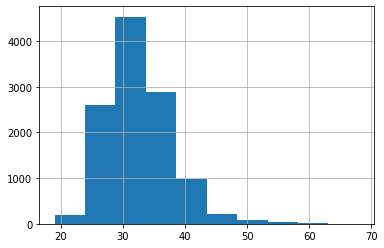

In [279]:
df['age'] = round(((pd.to_datetime('today') - df['dob']).dt.days) / 365 , 0)
df['age'].hist()

In [280]:
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age
0,736041664,A Jesus Garcia,ESP,male,1969-10-17,1.72,64.0,athletics,0,0,0,52.0
1,532037425,A Lam Shin,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0,35.0
2,435962603,Aaron Brown,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1,30.0
3,521041435,Aaron Cook,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0,31.0
4,33922579,Aaron Gate,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0,31.0


In [281]:
# Deleting unnecessary columns
del df['id'], df['name'], df['dob'], df['nationality']

###### 1. Кодирую категориальные переменные числовыми значениями.

In [282]:
df['sex'].replace(['female','male'],[0,1], inplace=True)

In [283]:
df.head()

,sex,height,weight,sport,gold,silver,bronze,age
0,1,1.72,64.0,athletics,0,0,0,52.0
1,0,1.68,56.0,fencing,0,0,0,35.0
2,1,1.98,79.0,athletics,0,0,1,30.0
3,1,1.83,80.0,taekwondo,0,0,0,31.0
4,1,1.81,71.0,cycling,0,0,0,31.0


In [284]:
X = pd.get_dummies( df, columns = ['sport'] )
X.head()

,sex,height,weight,gold,silver,bronze,age,sport_aquatics,sport_archery,sport_athletics,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1,1.72,64.0,0,0,0,52.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1.68,56.0,0,0,0,35.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1.98,79.0,0,0,1,30.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1.83,80.0,0,0,0,31.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,1.81,71.0,0,0,0,31.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [285]:
X = X[X.columns[1:]]
X.head(2)

,height,weight,gold,silver,bronze,age,sport_aquatics,sport_archery,sport_athletics,sport_badminton,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,64.0,0,0,0,52.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1.68,56.0,0,0,0,35.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [286]:
y = df['sex']
y.head(2)

0    1
1    0
Name: sex, dtype: int64

##### 2. Разделяю выборку на обучающее (80% данных) и тестовое (20% данных) подмножества

In [287]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [289]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [290]:
predictions = model.predict_proba(X_test)
predictions

array([[0.40622986, 0.59377014],
       [0.76765412, 0.23234588],
       [0.73333771, 0.26666229],
       ...,
       [0.14382852, 0.85617148],
       [0.72609236, 0.27390764],
       [0.8105234 , 0.1894766 ]])

##### 3. Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.

In [291]:
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1])

Площадь, рассчитанная roc_curve:  0.9032129473700181


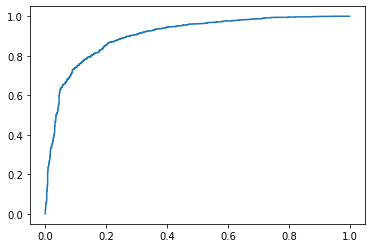

In [292]:
print('Площадь, рассчитанная roc_curve: ', auc(fpr, tpr))
plt.plot( fpr, tpr )

##### 4. Вычисляю значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.

In [293]:
roc_auc_score(y_test, predictions[:, 1])

0.9032129473700181

###### 5. Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.

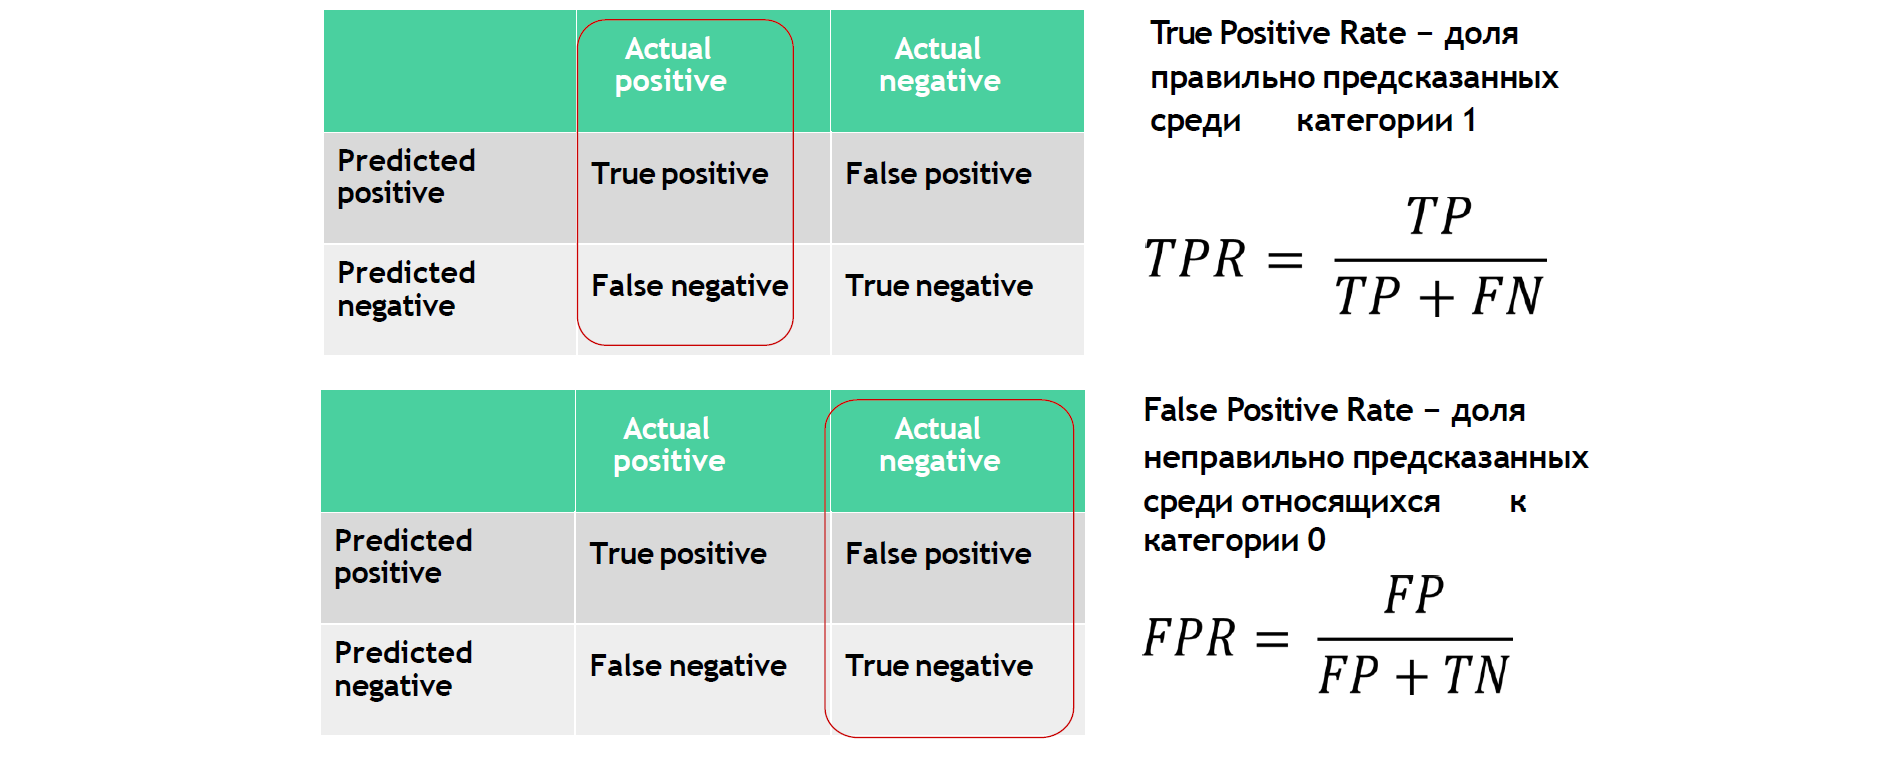

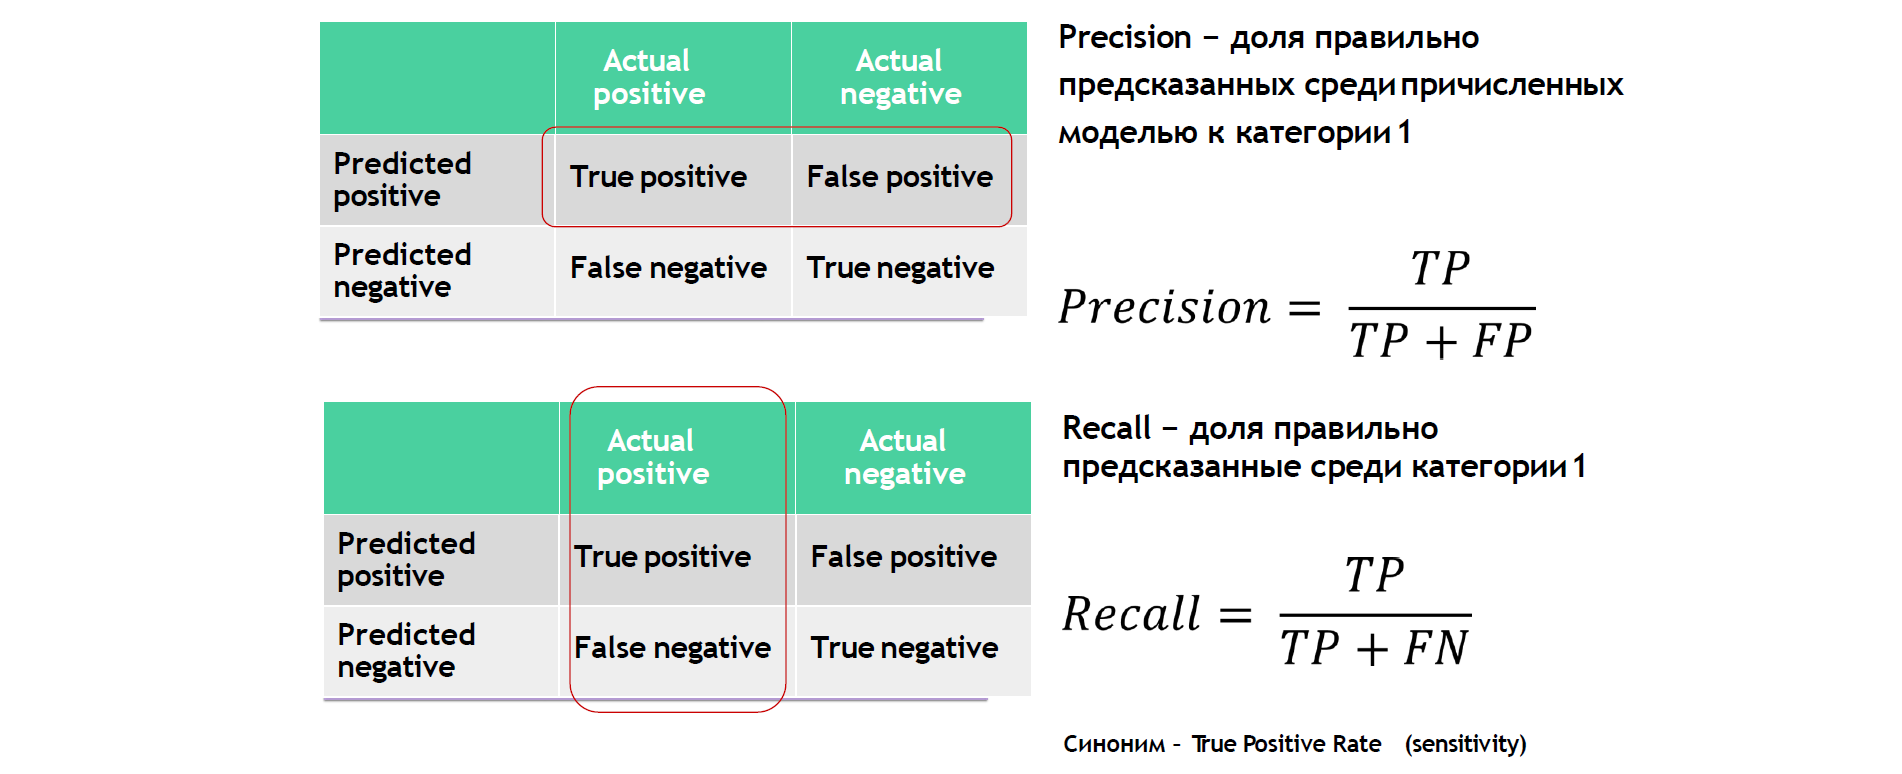

In [335]:
tpr2 = []
fpr2 = []
pr2 = []
re2 = []

for threshold in np.linspace(0,1,50):
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative
    y_pred = model.predict_proba( X_test )
    for predicted_prob, actual in zip( y_pred[:,1], y_test ):    
        if predicted_prob >= threshold:
            predicted = 1
        else:
            predicted = 0
        
        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1
        
        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
                
    tpr2.append(tp / (tp + fn))
    fpr2.append(fp / (fp + tn))
    if (tp + fp) == 0:
        continue
    pr2.append(tp / (tp + fp))
    re2.append(tp / (tp + fn))

Площадь, рассчитанная ручным способом:  0.9032133266578672


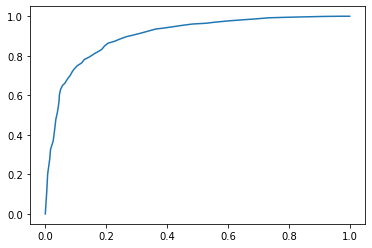

In [336]:
print('Площадь, рассчитанная ручным способом: ', auc(fpr2, tpr2))
plt.plot(fpr2, tpr2)

##### 6. Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.

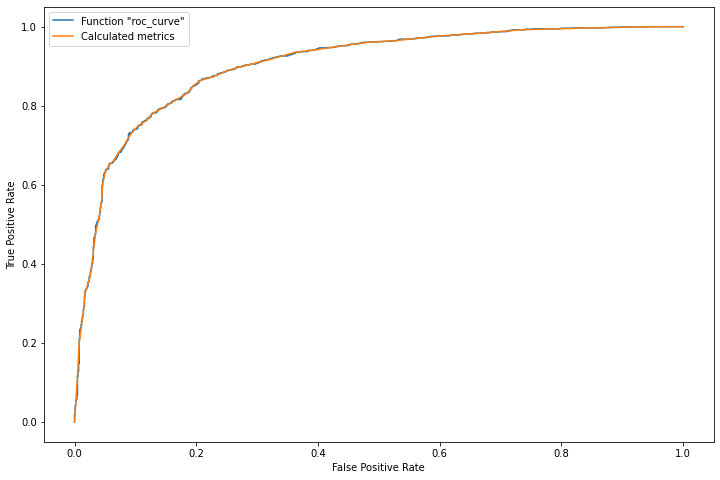

In [337]:
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label = 'Function "roc_curve"' )
plt.plot( fpr2, tpr2, label = 'Сalculated metrics' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

In [338]:
# Вывод:
# Судя по графикам, получились минимальные расхождения между метриками посчитанными с помощью функции 
# sklearn.metrics.roc_auc_score и метриками посчитанными вручную. Что говорит о правильности ручного расчета метрик. 
# Площадь под кривыми большая, а значит модель хорошо обучилась.

##### 7. Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.

In [339]:
from sklearn.metrics import precision_recall_curve

In [340]:
pr, re, thres = precision_recall_curve( y_test, predictions[:, 1] )

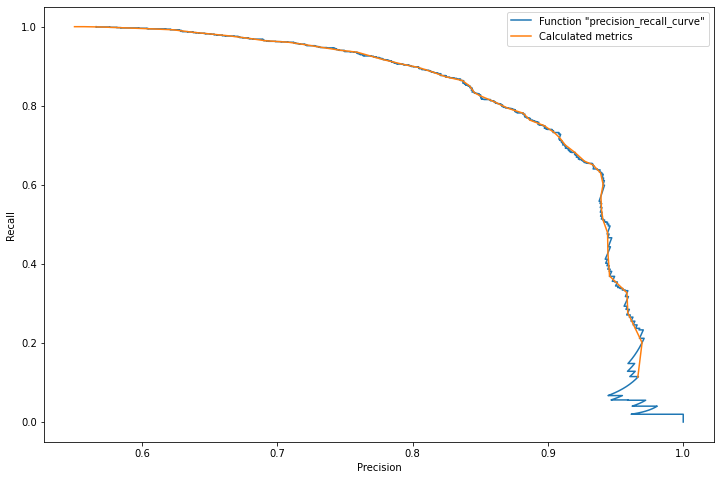

In [341]:
plt.figure(figsize=(12, 8))
plt.plot(pr, re, label = 'Function "precision_recall_curve"' )
plt.plot(pr2, re2, label = 'Сalculated metrics' )

plt.xlabel('Precision')
plt.ylabel('Recall ')

plt.legend( loc = 0 )
plt.show()

In [343]:
# площадь под кривой
average_precision_score(y_test, predictions[:, 1])

0.9112048592372244

##### 8. *Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.

In [354]:
roc_auc = auc(fpr2, tpr2)

print('Площадь, рассчитанная ручным способом: ', roc_auc)

Площадь, рассчитанная ручным способом:  0.9032133266578672


### ВЫВОДЫ: 
- как по полученным графикам сделать вывод о качестве модели? 
- Как вы оцениваете обученную модель исходя из подсчитанных метрик?
- *может ли ROC-кривая проходить ниже диагонали?

In [103]:
# Модель обучилась успешно, это видно по графикам и расчитанным метрикам. 
#  0.91 это очень хороший результат для логистической регрессии